In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

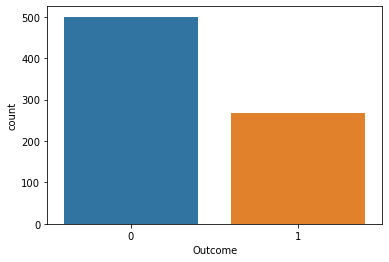

In [8]:
sns.countplot(diabetes['Outcome'], label = "Count")

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Preparing the training and testing Data for modeling

In [10]:


from sklearn.model_selection import train_test_split

#Stratifying the data to avoid sampling bias in a test set
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:,diabetes.columns !='Outcome'], diabetes['Outcome'], stratify= diabetes['Outcome'],random_state=324)

## Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(random_state = 1, max_depth= 4)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [14]:
print("Accuracy on training set ", tree.score(X_train, y_train))

print("Accuracy on test set ", tree.score(X_test, y_test))

Accuracy on training set  0.8003472222222222
Accuracy on test set  0.6770833333333334


In [15]:
diabetes_features = diabetes.columns.to_list()
diabetes_features.remove('Outcome')
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

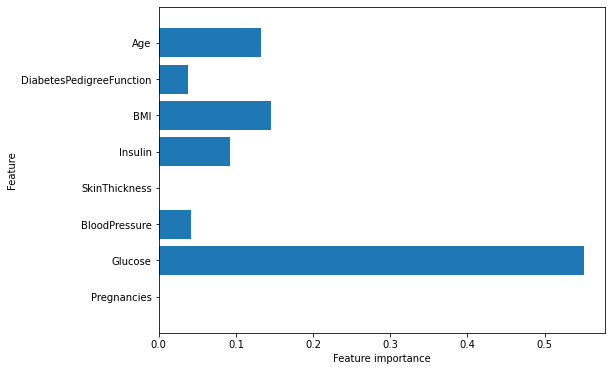

In [16]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

## Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth= 2, n_estimators=500,max_features ='sqrt',verbose=1)

rf.fit(X_train, y_train)

print("Accuracy on training set ", rf.score(X_train, y_train))

print("Accuracy on test set ", rf.score(X_test, y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on training set  0.7569444444444444
Accuracy on test set  0.7083333333333334


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


## Feature Importance

In [19]:
print(rf.feature_importances_)

[0.06712885 0.36392682 0.02728606 0.0225591  0.08294987 0.2016881
 0.07667971 0.15778148]


Feature Importance for Random Forest

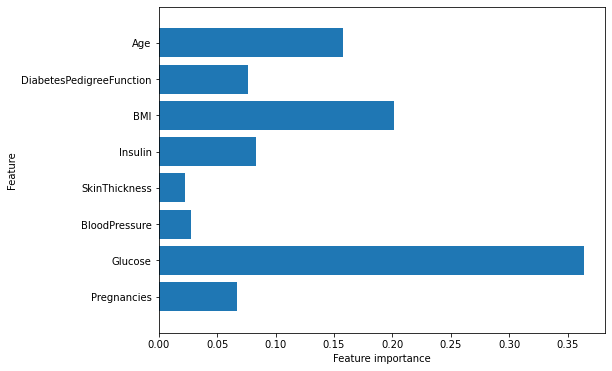

In [21]:
plot_feature_importances_diabetes(rf)  

<i><b> <u> Note </u>: Variables like Glucose, BMI and Age are majorly used for predicting diabetes.

## Applying Hyperparameter tuning for Random forest Model

In [1]:
param_grid = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
#GridSearchCV
hpt = GridSearchCV(rf, param_grid, cv=3, verbose = 2)
hpt.fit(X_train, y_train)

# hpt.best_estimator_



NameError: name 'GridSearchCV' is not defined

In [24]:
#Finding the best parameters
hpt.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=10, min_samples_split=10,
                       n_estimators=500, random_state=0, verbose=1)

### Running Random Forest Model with best estimators

In [26]:
rf_hpt = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=10, min_samples_split=10,
                       n_estimators=500, random_state=0, verbose=1)

rf_hpt.fit(X_train, y_train)

print("Accuracy on training set ", rf_hpt.score(X_train, y_train))

print("Accuracy on test set ", rf_hpt.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on training set  0.8263888888888888
Accuracy on test set  0.7552083333333334


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


## Deep Learning Model

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler



In [28]:
mlp = MLPClassifier(random_state= 1)

mlp.fit(X_train, y_train)

print(" train acc",mlp.score(X_train, y_train))
print(" test acc ",mlp.score(X_test, y_test))

 train acc 0.7604166666666666
 test acc  0.671875


In [31]:
sc = StandardScaler()

In [41]:
X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

mlp = MLPClassifier(random_state= 2, max_iter=1000,alpha =1)

mlp.fit(X_train_sc, y_train)

print(" train acc",mlp.score(X_train_sc, y_train))
print(" test acc ",mlp.score(X_test_sc, y_test))

 train acc 0.8159722222222222
 test acc  0.7708333333333334


NameError: name 'X_test' is not defined